In [1]:
# Khai báo thư viện
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv")
# lọc dữ liệu gạo bán lẻ (Rice - Retail) ở National Average
df_rice = df[(df.ProductName == "Rice - Retail") & ( df.Place == "National Average")]
print("kích thước bộ dữ liệu: " ,df_rice.shape)
print ("mô tả bộ dữ liệu")
df_rice.describe()

kích thước bộ dữ liệu:  (66, 8)
mô tả bộ dữ liệu


,ProductId,UmId,Month,Year,Price
count,66.0,66.0,66.000000,66.000000,66.000000
mean,52.0,5.0,6.454545,2016.257576,7.084923
std,0.0,0.0,3.561252,1.947864,1.417041
min,52.0,5.0,1.000000,2013.000000,4.492000
25%,52.0,5.0,3.000000,2015.000000,6.117500
50%,52.0,5.0,6.000000,2016.000000,6.523500
75%,52.0,5.0,9.750000,2018.000000,8.401025
max,52.0,5.0,12.000000,2019.000000,9.561600


C:\Users\Admin\AppData\Local\Temp\ipykernel_22616\3921096083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice['time'] =  pd.to_datetime(df_rice['Year'].astype(str) + '/'+df_rice['Month'].astype(str))


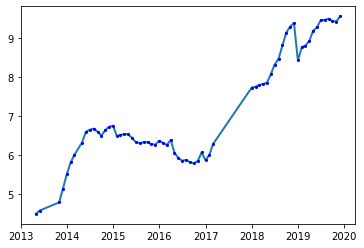

In [3]:
# vẽ mối hiên hệ giữa thời gian và giá gạo
df_rice['time'] =  pd.to_datetime(df_rice['Year'].astype(str) + '/'+df_rice['Month'].astype(str))
plt.plot(df_rice['time'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

#### Tiến hành kiểm định
Do thời gian nhận giá trị tăng dần nên có thể được coi là một biến định lượng
Thực hiện kiểm định pearson để tiến hành kiểm định mối liên hệ giữa hai biến thời gian và giá
Biên đổi thời gian về dạng định lượng như sau: lấy mốc 1/2013 là mốc 1 tương đối, 1 tháng sẽ được tính là một đơn vị thời gian

C:\Users\Admin\AppData\Local\Temp\ipykernel_22616\1467245114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice['time_processed'] = df_rice.Month + (df_rice.Year -2013)*12


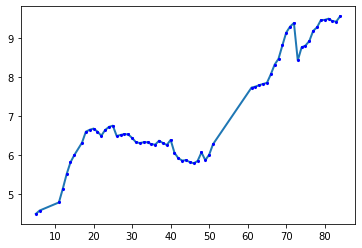

In [4]:
# Biến đổi thời gian
df_rice['time_processed'] = df_rice.Month + (df_rice.Year -2013)*12
# Vẽ lại biểu đồ liên hệ giữa time_processed và giá gạo
plt.plot(df_rice['time_processed'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

#### Tiến hành kiểm định

Giả thuyết không: Giữa thời gian và giá gạo không có mối tương quan
Giả thuyết đối: Giữa thời gian và giá gạo có mối tương quan

In [5]:
print  ("hệ số tương quan và pvalue tương ứng là: \n",stats.pearsonr(df_rice.time_processed, df_rice.Price))

hệ số tương quan và pvalue tương ứng là: 
 (0.8836736355854857, 8.9313262768526e-23)


#### Nhận xét: Do pvalue ~0, và hệ số tương quan =0.88 nên giữ thời gian và giá gạo có mối tương quan thuận rất chặt với nhau